In [8]:
!pwd
import sys
import os
path = os.getcwd()
path += '/../../'
sys.path.append(path)
from tabulate import tabulate

import plot_utils
import numpy as np
from skyburst.plot import *
import matplotlib.pyplot as plt
import pandas as pd 
from collections import OrderedDict 
import math
import heapq
import re
from IPython.display import display
import itertools
import pickle
pd.set_option('display.max_columns', None)

/home/gcpuser/starburst/starburst/plots


In [9]:
SWEEP_LOG_IDS = {
    'no-wait': 'no-wait', # REPLACE with your sweep log run_id in `sweep_logs/[RUN_ID]`
    'constant-wait': 'constant-wait', # REPLACE with your sweep log run_id
    'starburst': 'compute-wait', # REPLACE with your sweep log run_id
    'starburst-note': 'star-wait', # REPLACE with your sweep log run_id
}

# No-Wait

# Cloud Jobs 24
# Total Jobs 115


idx               [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
runtime           [0.47194444444444444, 0.5119444444444444, 0.77...
arrival           [0.0, 0.1124120878511005, 0.15910412655936348,...
num_gpus          [2, 8, 1, 2, 1, 1, 1, 1, 1, 4, 2, 1, 1, 1, 4, ...
allocated_gpus    [{0: [0, 1]}, {1: [0, 1, 2, 3, 4, 5, 6, 7]}, {...
start             [0.00013357824749416774, 0.1123558004697164, 0...
num_cpus          [6, 24, 3, 6, 3, 3, 3, 3, 3, 12, 6, 3, 3, 3, 1...
wait_times        [0.00041135602527194554, 0.0002214903963936699...
state             [LOCAL, LOCAL, LOCAL, LOCAL, LOCAL, LOCAL, LOC...
stats             image                                     gcr....
Name: 0, dtype: object

  # Cluster Nodes    Total Cloud Cost    Avg. Cloud Cost    Avg. Waiting    Avg. JCT    90th JCT    99th JCT    Cluster Utilization    System Utilization
-----------------  ------------------  -----------------  --------------  ----------  ----------  ----------  ---------------------  --------------------
                4             48.7233            18.3482     0.000885079    0.694093     1.91177      2.7742               0.831114               1.14347
TOTAL CLOUD COST: 48.723333333333336


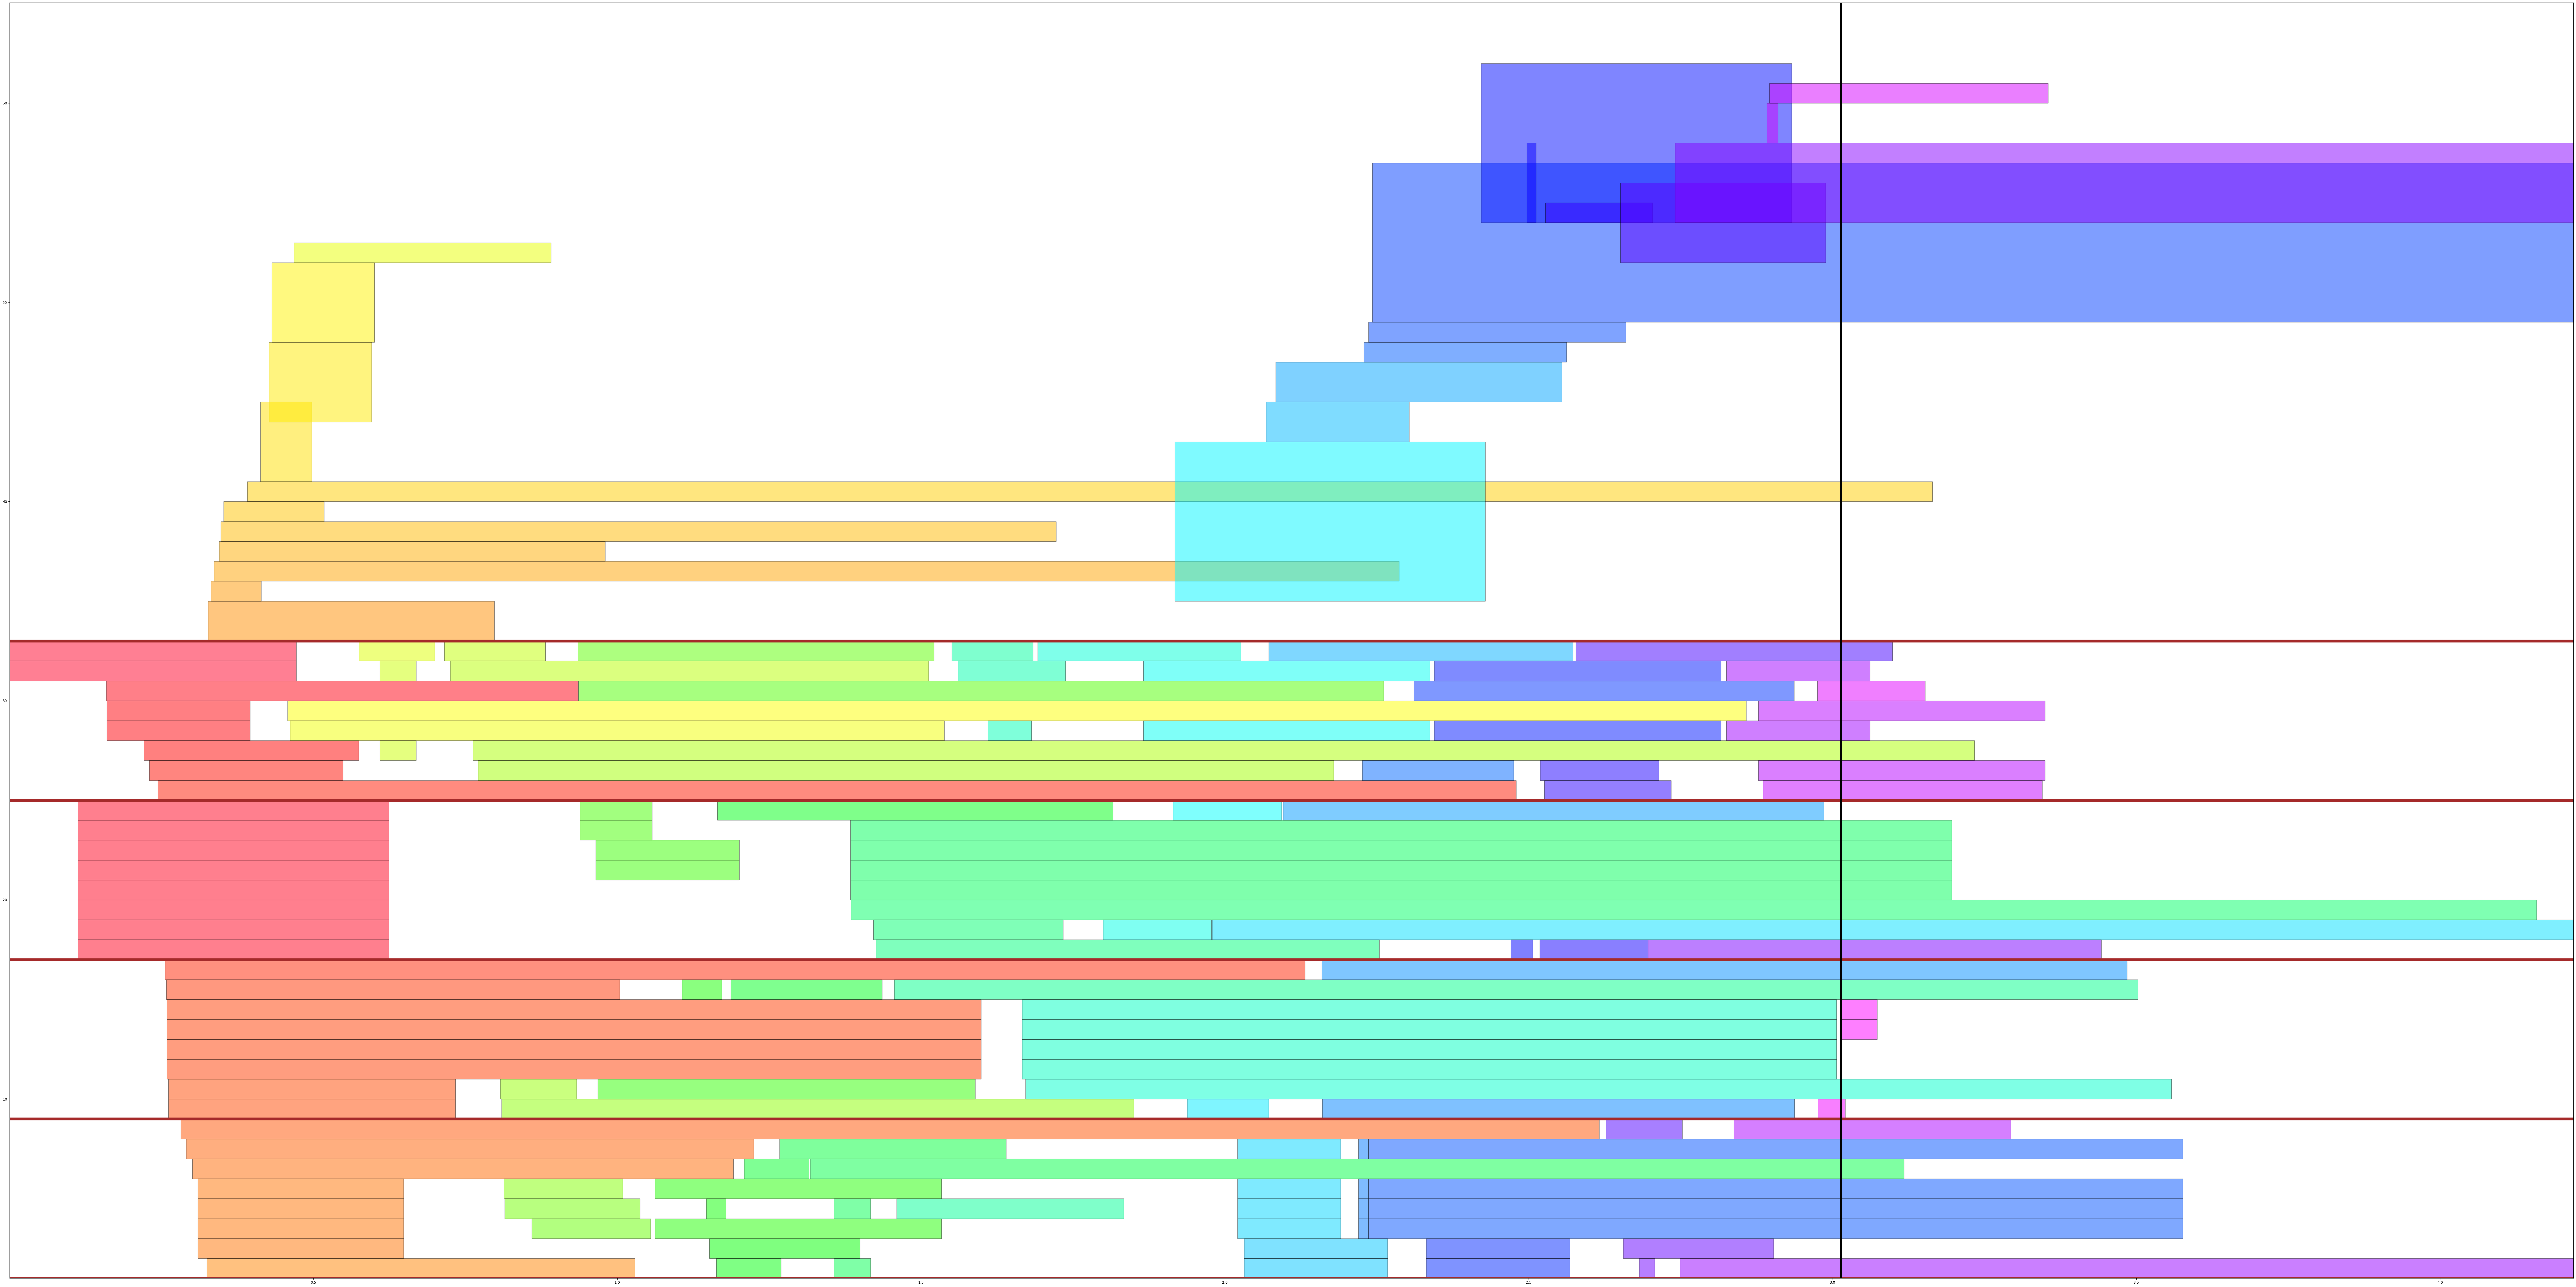

In [19]:
# Note, we do not have information of gpu indexes in a node unlike simulator, hence our algorithm to figure out gpu index for a job can be faulty. However, the cloud spilled jobs are correct.
log_id =  SWEEP_LOG_IDS['no-wait']
jobs_df = plot_utils.parse_sweep(event_number=log_id)
jobs_df = plot_utils.index_mapping(jobs_df)
display(jobs_df)
stats_dict = plot_utils.compute_stats(jobs_df, warmup_jobs=5)
print(f"TOTAL CLOUD COST: {stats_dict['total_cloud_cost']}")
plot_trace_spacetime_and_spillover(jobs_df, 4)

# Constant-Wait

# Cloud Jobs 13
# Total Jobs 115


idx               [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
runtime           [0.47194444444444444, 0.5119444444444444, 0.77...
arrival           [0.0, 0.11240598791175418, 0.15910187350379096...
num_gpus          [2, 8, 1, 2, 1, 1, 1, 1, 1, 4, 2, 1, 1, 1, 4, ...
allocated_gpus    [{0: [0, 1]}, {1: [0, 1, 2, 3, 4, 5, 6, 7]}, {...
start             [-4.421836800045437e-05, 0.11217800385422176, ...
num_cpus          [6, 24, 3, 6, 3, 3, 3, 3, 3, 12, 6, 3, 3, 3, 1...
wait_times        [-4.421836800045437e-05, 4.979372024536133e-05...
state             [LOCAL, LOCAL, LOCAL, LOCAL, LOCAL, LOCAL, LOC...
stats             image                                     gcr....
Name: 0, dtype: object

  # Cluster Nodes    Total Cloud Cost    Avg. Cloud Cost    Avg. Waiting    Avg. JCT    90th JCT    99th JCT    Cluster Utilization    System Utilization
-----------------  ------------------  -----------------  --------------  ----------  ----------  ----------  ---------------------  --------------------
                4             37.4078            14.0867       0.0619406    0.755221      2.0035     2.77373               0.867685               1.07716
TOTAL CLOUD COST: 37.407777777777774


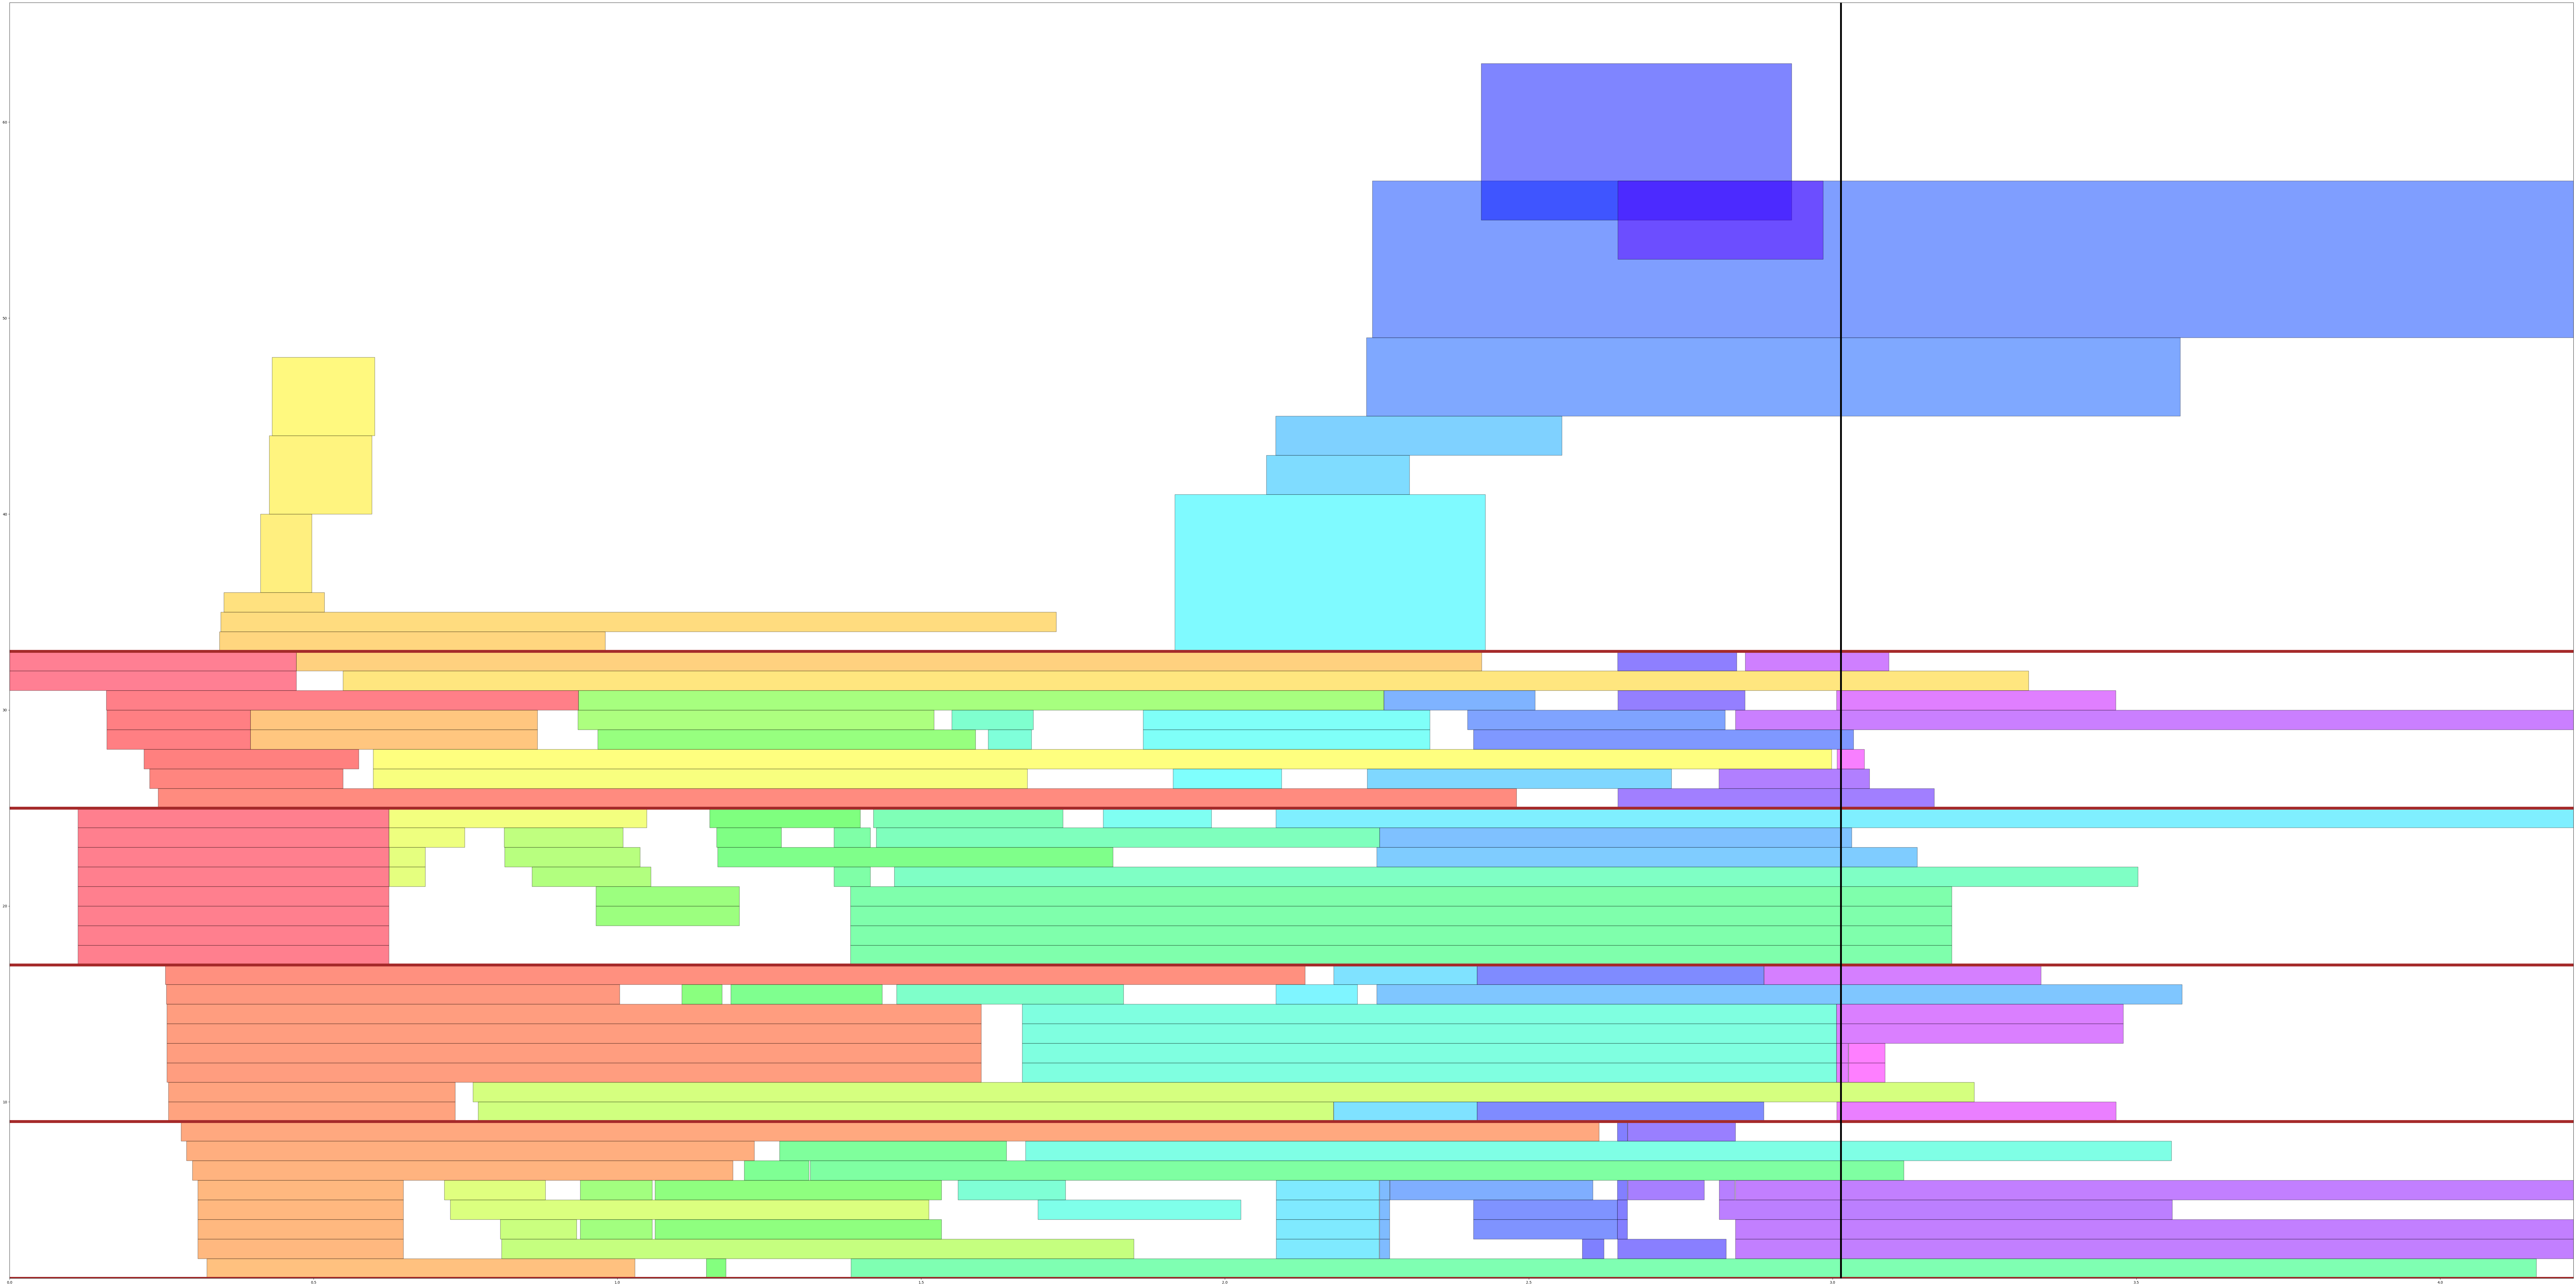

In [20]:
# Note, we do not have information of gpu indexes in a node unlike simulator, hence our algorithm to figure out gpu index for a job can be faulty. However, the cloud spilled jobs are correct.
log_id =  SWEEP_LOG_IDS['constant-wait']
jobs_df = plot_utils.parse_sweep(event_number=log_id)
jobs_df = plot_utils.index_mapping(jobs_df)
display(jobs_df)
stats_dict = plot_utils.compute_stats(jobs_df, warmup_jobs=5)
print(f"TOTAL CLOUD COST: {stats_dict['total_cloud_cost']}")
plot_trace_spacetime_and_spillover(jobs_df, 4)

# Starburst

# Cloud Jobs 18
# Total Jobs 115
  # Cluster Nodes    Total Cloud Cost    Avg. Cloud Cost    Avg. Waiting    Avg. JCT    90th JCT    99th JCT    Cluster Utilization    System Utilization
-----------------  ------------------  -----------------  --------------  ----------  ----------  ----------  ---------------------  --------------------
                4             15.9436            6.00391       0.0434404    0.736672     1.91218      2.8543               0.889497              0.990168
TOTAL CLOUD COST: 15.943611111111112


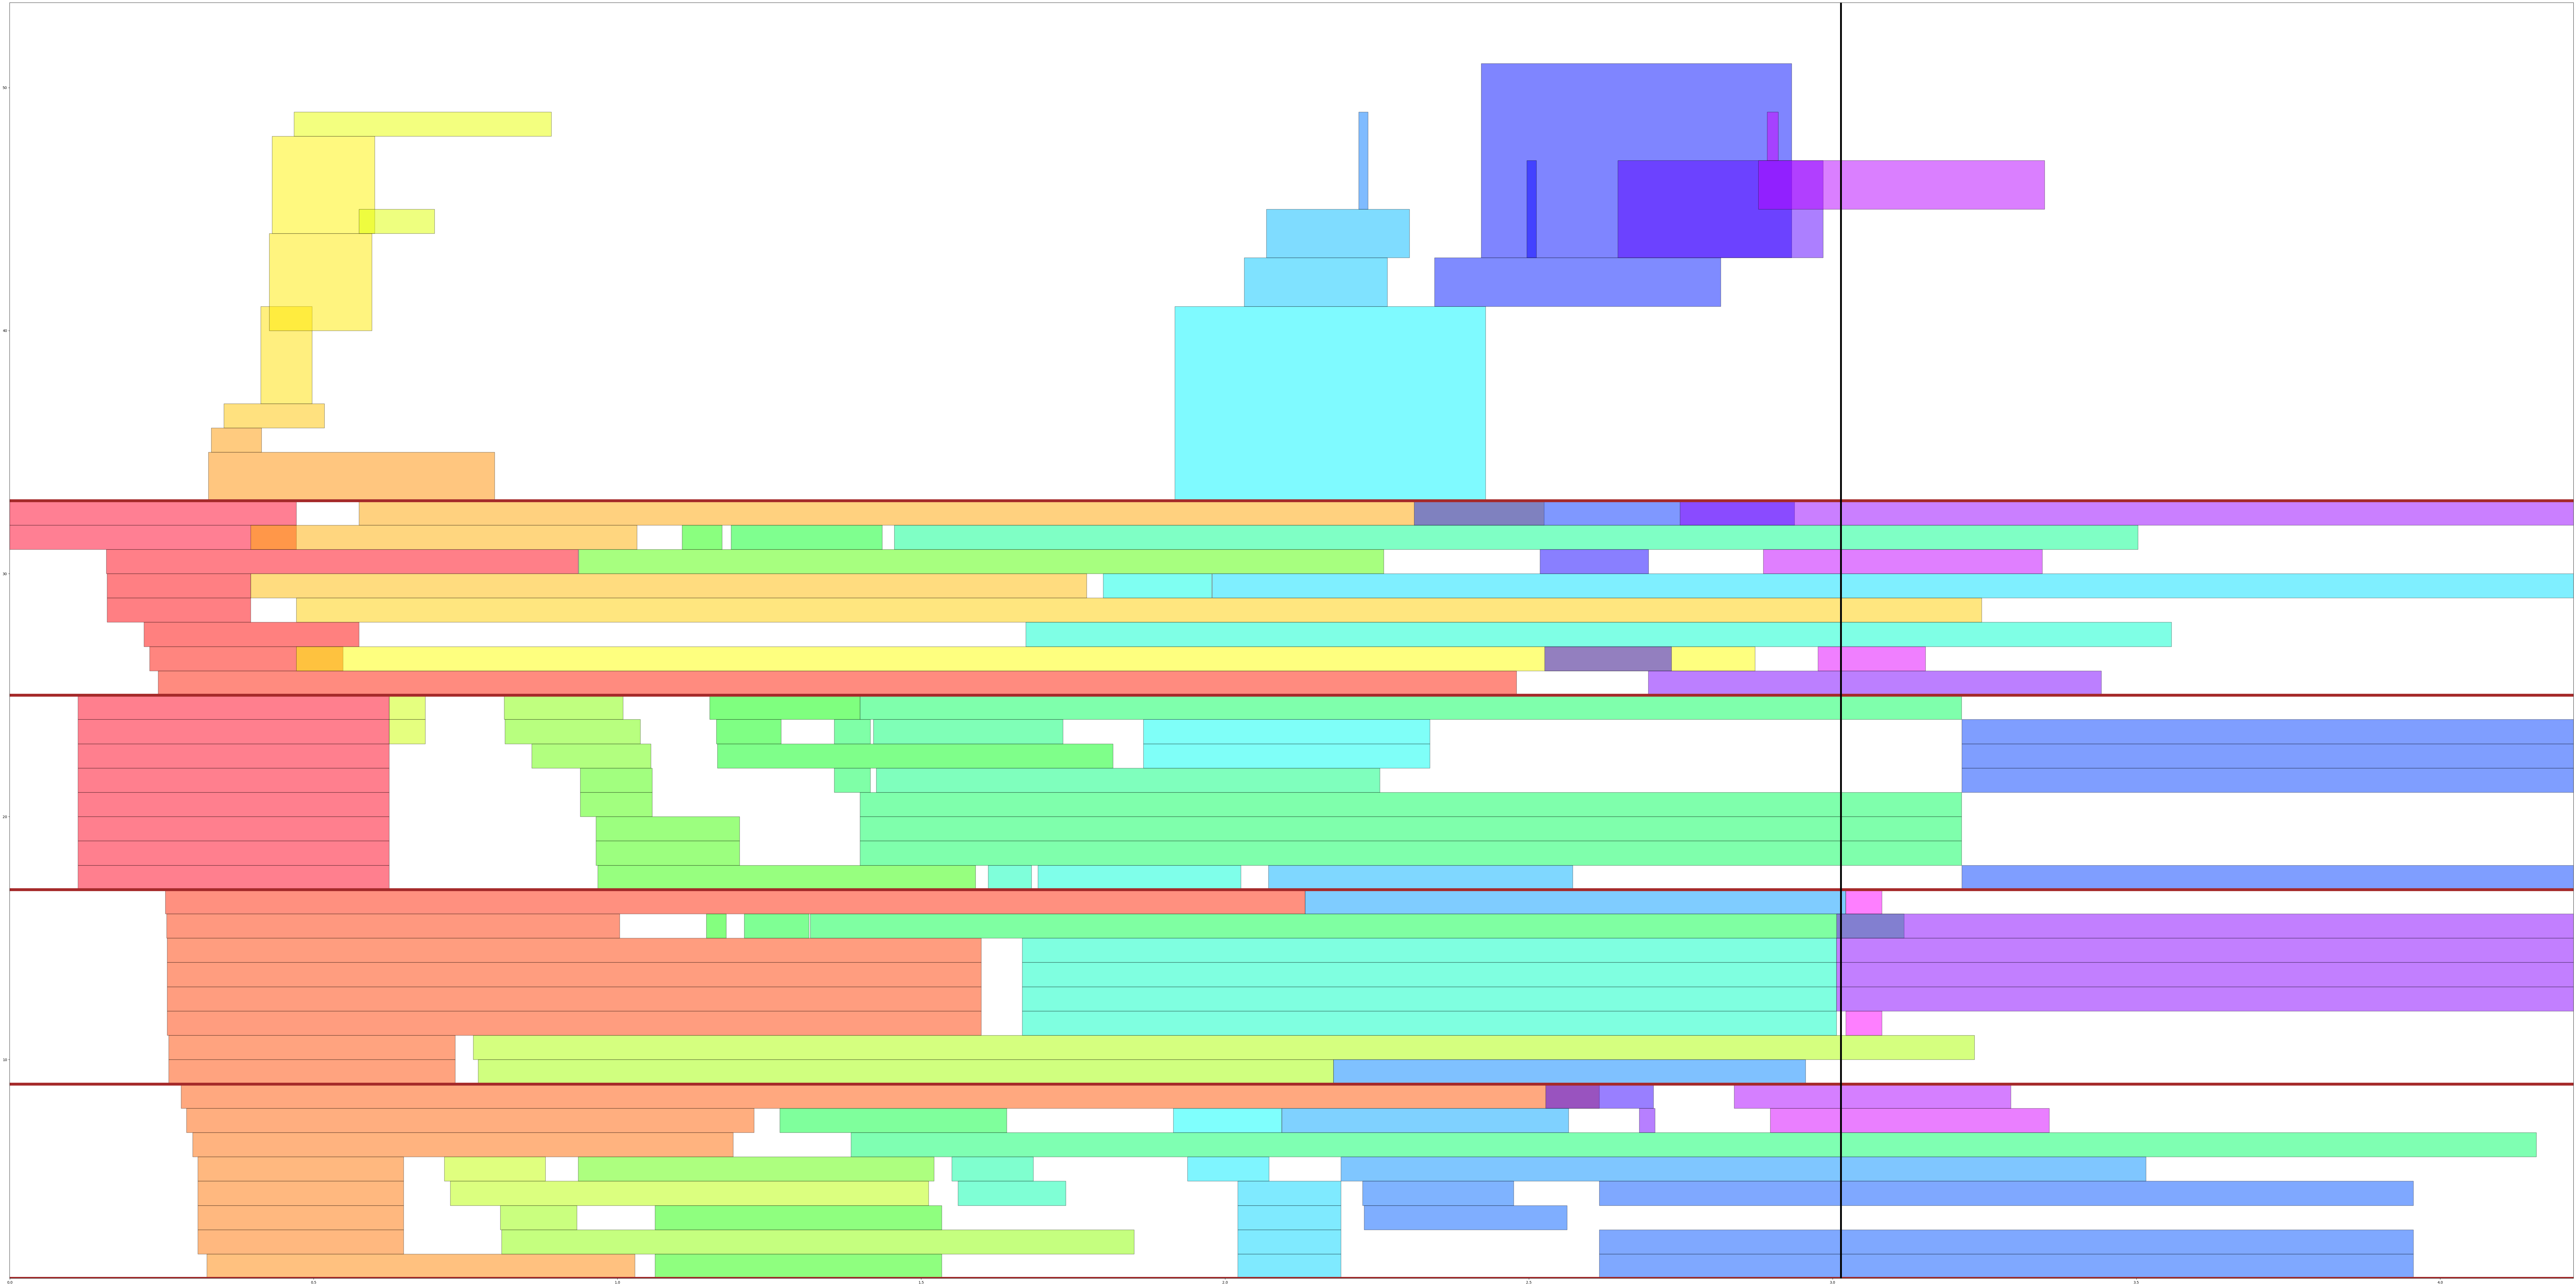

In [10]:
log_id =  SWEEP_LOG_IDS['starburst']
jobs_df = plot_utils.parse_sweep(event_number=log_id)
# Note, we do not have information of gpu indexes in a node unlike simulator, hence our algorithm to figure out gpu index for a job can be faulty. However, the cloud spilled jobs are correct.
jobs_df = plot_utils.index_mapping(jobs_df)
display(jobs_df)
stats_dict = plot_utils.compute_stats(jobs_df, warmup_jobs=5)
print(f"TOTAL CLOUD COST: {stats_dict['total_cloud_cost']}")
plot_trace_spacetime_and_spillover(jobs_df, 4)

# Starburst w/ No Time Estimator

# Cloud Jobs 13
# Total Jobs 115


idx               [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
runtime           [0.4716666666666667, 0.5119444444444444, 0.776...
arrival           [0.0, 0.11240525636408064, 0.15912091102865006...
num_gpus          [2, 8, 1, 2, 1, 1, 1, 1, 1, 4, 2, 1, 1, 1, 4, ...
allocated_gpus    [{0: [0, 1]}, {1: [0, 1, 2, 3, 4, 5, 6, 7]}, {...
start             [-0.00018687155511644152, 0.11231312844488356,...
num_cpus          [6, 24, 3, 6, 3, 3, 3, 3, 3, 12, 6, 3, 3, 3, 1...
wait_times        [9.090622266133627e-05, 0.00018564985858069525...
state             [LOCAL, LOCAL, LOCAL, LOCAL, LOCAL, LOCAL, LOC...
stats             image                                     gcr....
Name: 0, dtype: object

  # Cluster Nodes    Total Cloud Cost    Avg. Cloud Cost    Avg. Waiting    Avg. JCT    90th JCT    99th JCT    Cluster Utilization    System Utilization
-----------------  ------------------  -----------------  --------------  ----------  ----------  ----------  ---------------------  --------------------
                4             18.3325             6.9036       0.0815837    0.774836     2.02441     2.93107                0.88311              0.939142
TOTAL CLOUD COST: 18.3325


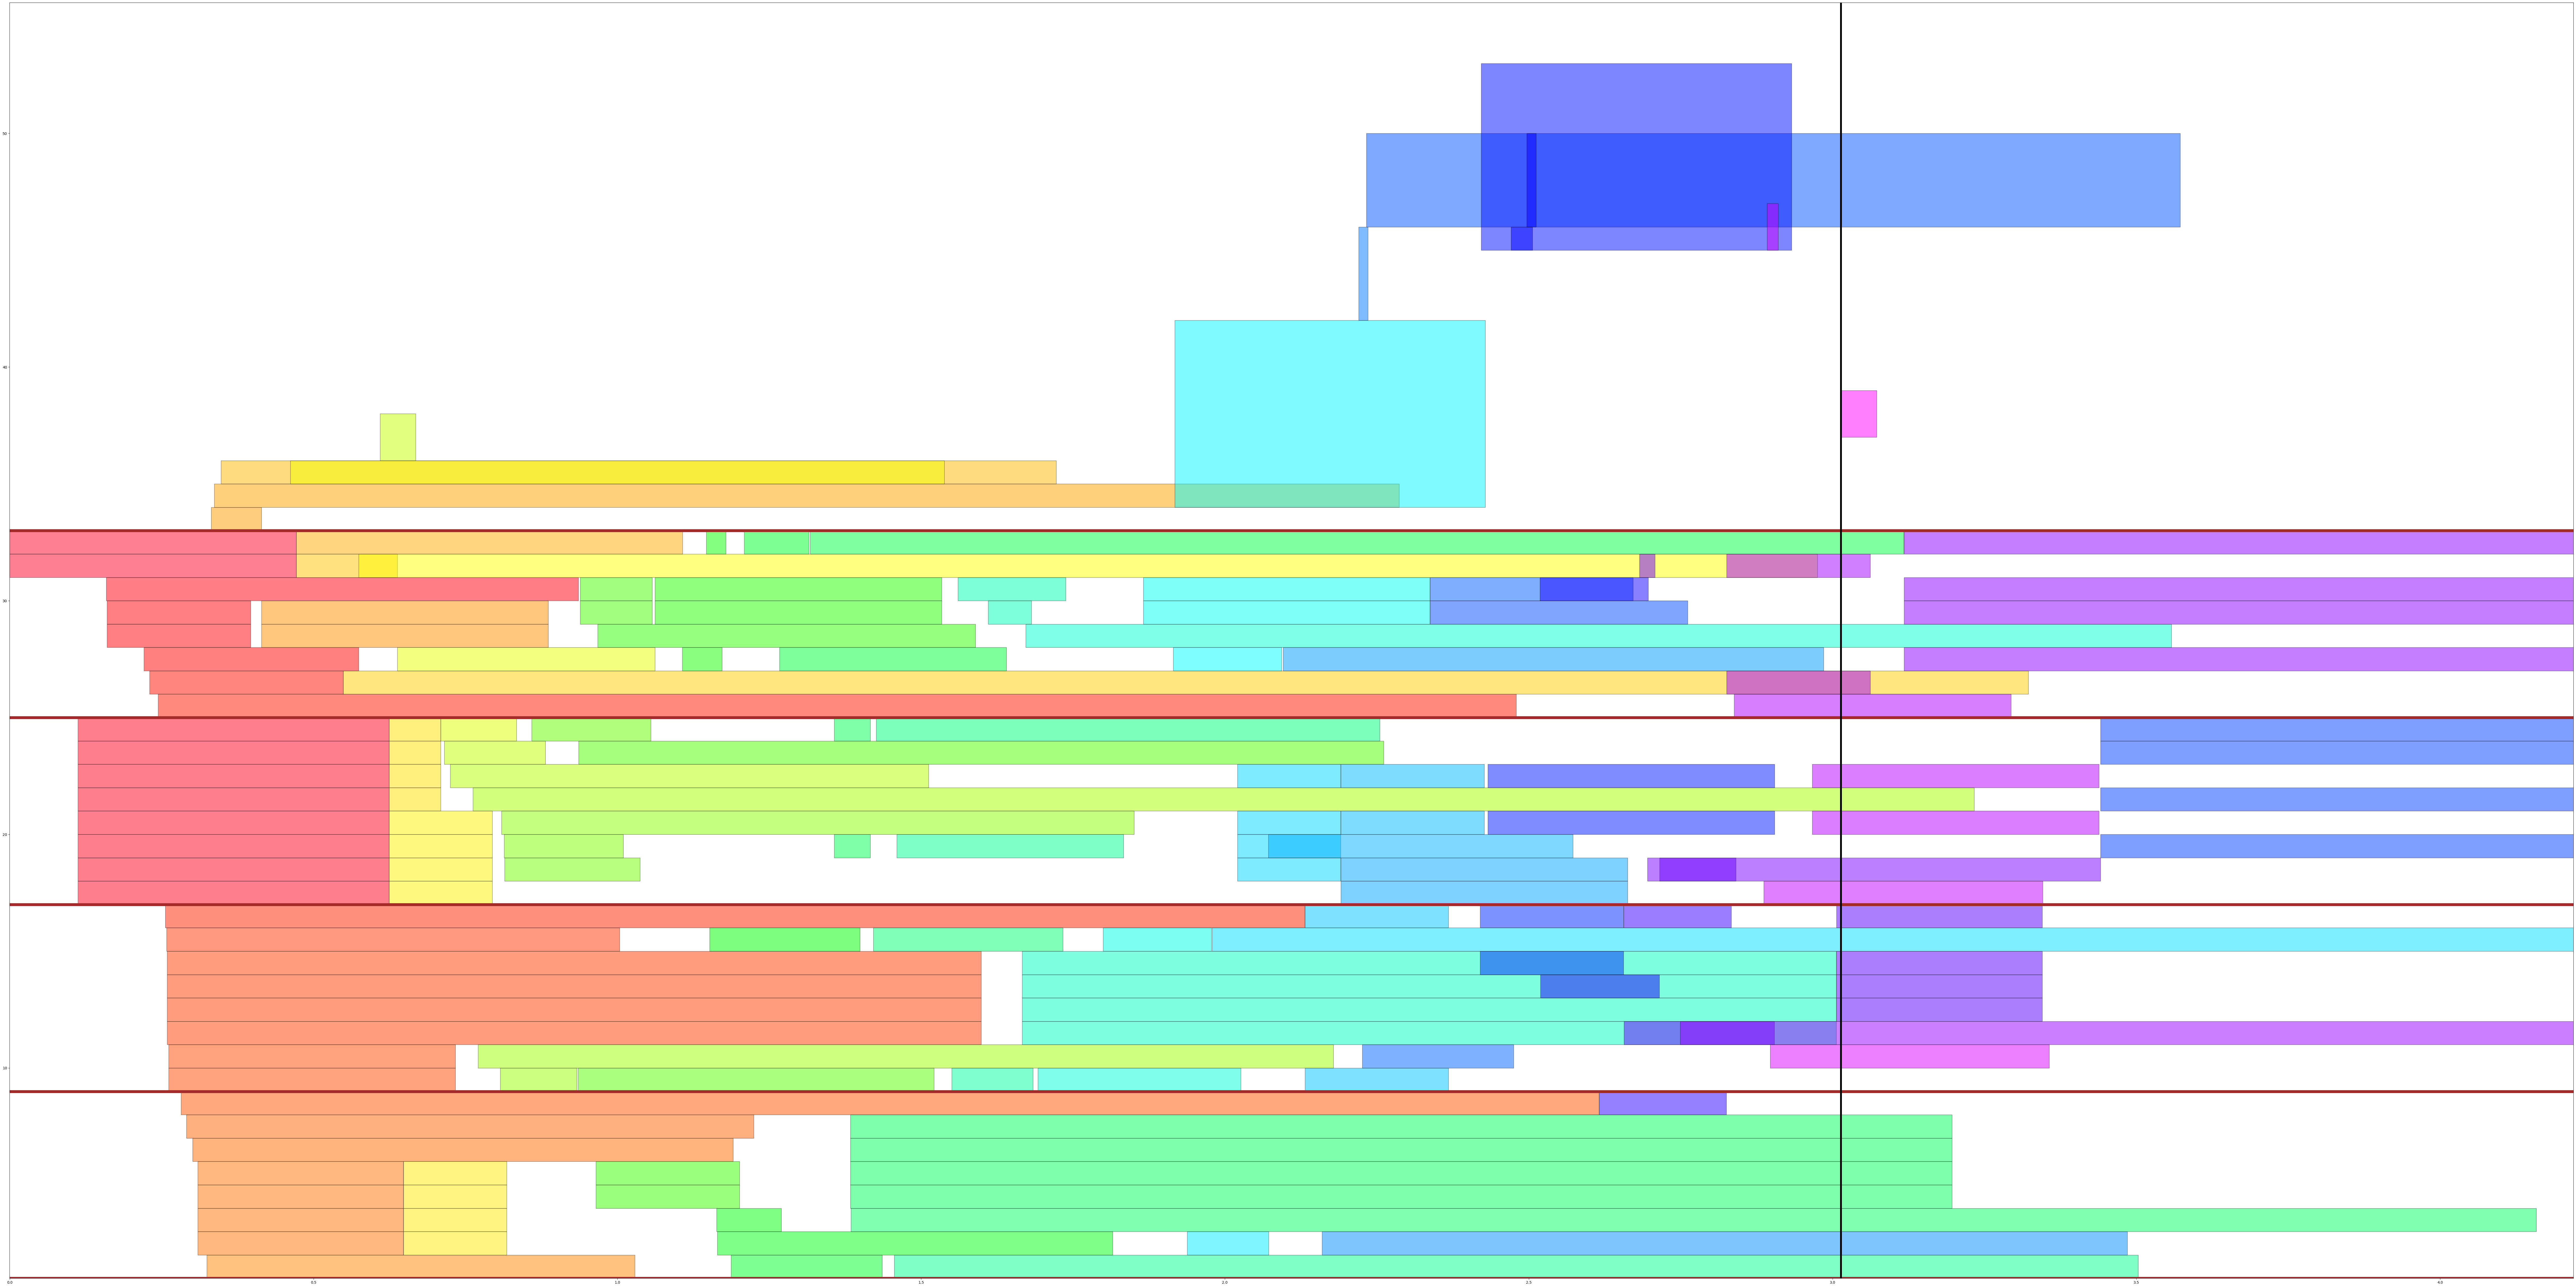

In [23]:
# Note, we do not have information of gpu indexes in a node unlike simulator, hence our algorithm to figure out gpu index for a job can be faulty. However, the cloud spilled jobs are correct.
log_id = SWEEP_LOG_IDS['starburst-note']
jobs_df = plot_utils.parse_sweep(event_number=log_id)
jobs_df = plot_utils.index_mapping(jobs_df)
display(jobs_df)
stats_dict = plot_utils.compute_stats(jobs_df, warmup_jobs=5)
print(f"TOTAL CLOUD COST: {stats_dict['total_cloud_cost']}")
plot_trace_spacetime_and_spillover(jobs_df, 4)